In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (2).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (285).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (166)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (290)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (300).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (390).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (357).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (430)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (89)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (261)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUS

Displaying images for class: benign


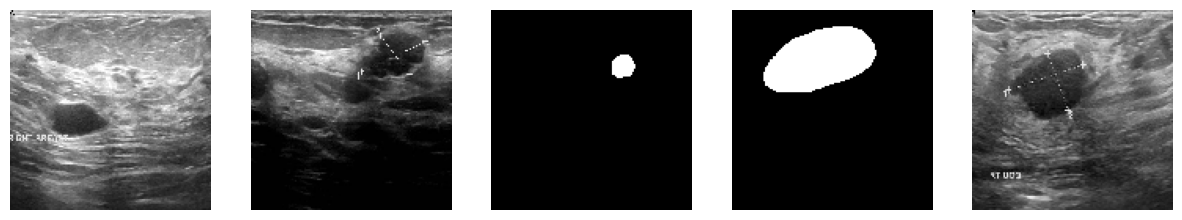

Displaying images for class: normal


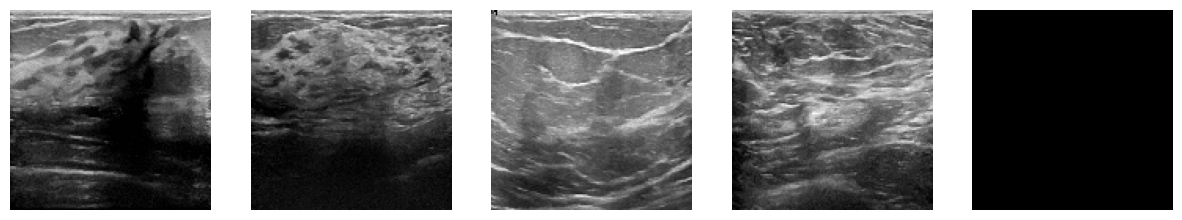

Displaying images for class: malignant


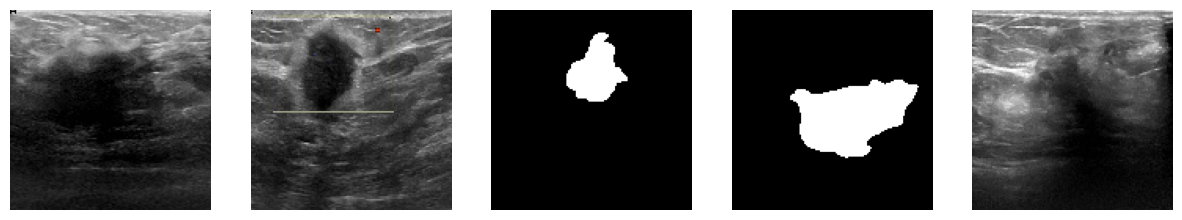

In [4]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Parameters
img_width, img_height = 128, 128
num_images_per_class = 5  # Number of images to display per class

# Path to dataset
dataset_dir = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT'  # Update this path
image_dir_test = '/kaggle/input/'
def display_images_from_classes(directory, num_images=5):
    class_folders = [f for f in os.listdir(directory) if os.path.isdir(os.path.join(directory, f))]
    
    for class_folder in class_folders:
        class_path = os.path.join(directory, class_folder)
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        
        print(f"Displaying images for class: {class_folder}")
        fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
        axes = axes.flatten()
        
        # Randomly select images
        for i, img_file in enumerate(image_files[:num_images]):
            img_path = os.path.join(class_path, img_file)
            img = load_img(img_path, target_size=(img_width, img_height))
            img_array = img_to_array(img) / 255.0  # Normalize pixel values
            
            axes[i].imshow(img_array)
            axes[i].axis('off')
        
        plt.show()

# Call the function to display images from each class in the dataset
display_images_from_classes(dataset_dir, num_images_per_class)


In [5]:
import os
import warnings
warnings.filterwarnings("ignore")

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import random
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import classification_report, confusion_matrix

# Set a seed for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Setting the path to the dataset
dataset_path = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT'
image_dir_test = '/kaggle/input/your_test_image_dataset'

Total benign images: 891
Total malignant images: 421
Total normal images: 266


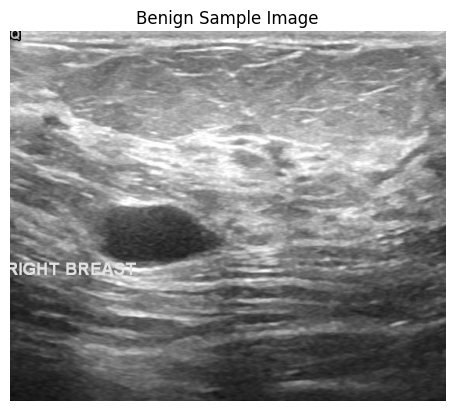

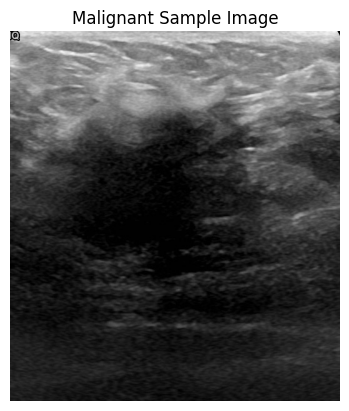

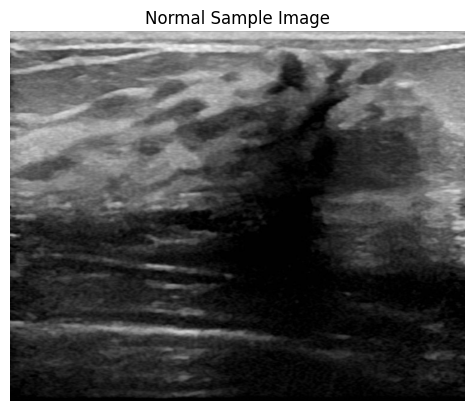

In [7]:
# Count the total number of images in each category
benign_path = os.path.join(dataset_path, 'benign')
malignant_path = os.path.join(dataset_path, 'malignant')
normal_path = os.path.join(dataset_path, 'normal')

# Count images in each folder
benign_images = len(os.listdir(benign_path))
malignant_images = len(os.listdir(malignant_path))
normal_images = len(os.listdir(normal_path))

# Print the total number of images in each category
print(f"Total benign images: {benign_images}")
print(f"Total malignant images: {malignant_images}")
print(f"Total normal images: {normal_images}")

# Show sample image from each category
benign_sample = os.path.join(benign_path, os.listdir(benign_path)[0])
malignant_sample = os.path.join(malignant_path, os.listdir(malignant_path)[0])
normal_sample = os.path.join(normal_path, os.listdir(normal_path)[0])

# Load and display images
def display_image(image_path, title):
    img = cv2.imread(image_path)  # Read the image
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display images from each category
display_image(benign_sample, 'Benign Sample Image')
display_image(malignant_sample, 'Malignant Sample Image')
display_image(normal_sample, 'Normal Sample Image')

In [8]:
# Creating a DataFrame to keep track of the image categories
image_data = {
    'Category': ['Benign'] * benign_images + ['Malignant'] * malignant_images + ['Normal'] * normal_images,
    'Image_Name': os.listdir(benign_path) + os.listdir(malignant_path) + os.listdir(normal_path)
}

# Convert it to a DataFrame
df = pd.DataFrame(image_data)

# Display the first few rows
print(df.head())

# Check data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

# Show dataset statistics
print(df.describe())

  Category             Image_Name
0   Benign         benign (2).png
1   Benign       benign (285).png
2   Benign  benign (166)_mask.png
3   Benign  benign (290)_mask.png
4   Benign       benign (300).png
Category      object
Image_Name    object
dtype: object
Category      0
Image_Name    0
dtype: int64
       Category      Image_Name
count      1578            1578
unique        3            1578
top      Benign  benign (2).png
freq        891               1


In [9]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("/kaggle/input"))


# Any results you write to the current directory are saved as output

['breast-ultrasound-images-dataset']


In [10]:
import os, pandas as pd
image_dir = '/kaggle/input/'
df = pd.DataFrame([(os.path.join(root, file), os.path.basename(root)) for root, _, files in os.walk(image_dir) for file in files], columns=['image_path', 'label'])
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (1578, 2)


,image_path,label
0,/kaggle/input/breast-ultrasound-images-dataset...,benign
1,/kaggle/input/breast-ultrasound-images-dataset...,benign
2,/kaggle/input/breast-ultrasound-images-dataset...,benign
3,/kaggle/input/breast-ultrasound-images-dataset...,benign
4,/kaggle/input/breast-ultrasound-images-dataset...,benign


In [11]:
# Put labels into Y_train variable
Y_train = df["label"]

# Put image paths into X_train variable
X_train = df["image_path"]


label
benign       891
malignant    421
normal       266
Name: count, dtype: int64

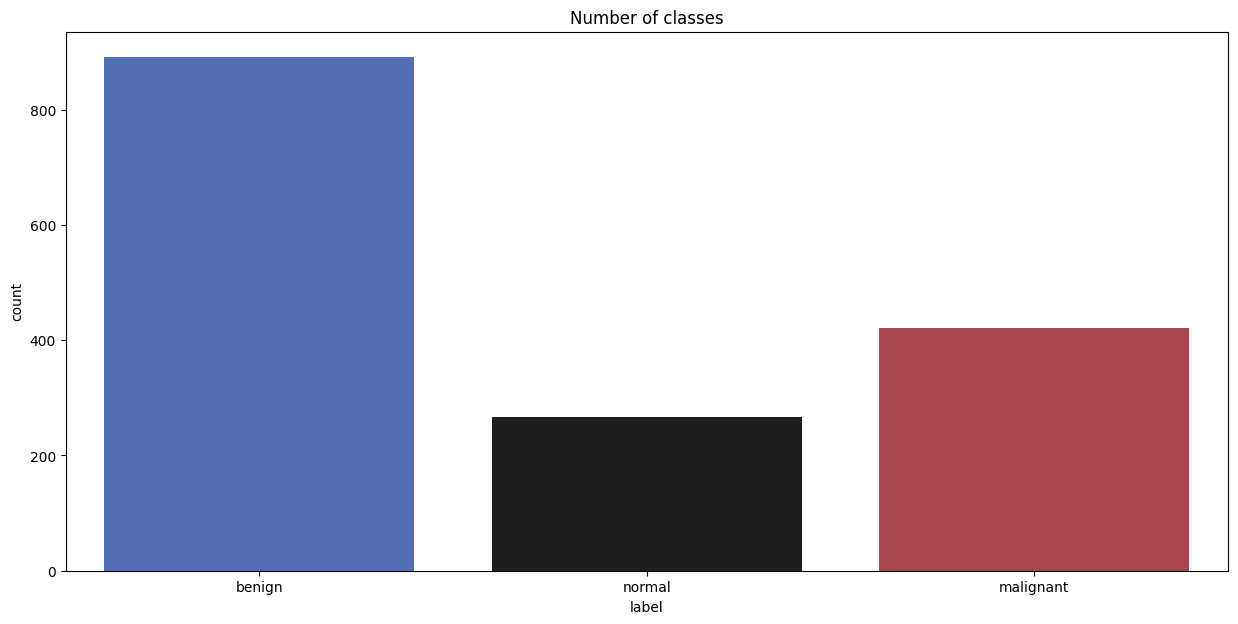

In [12]:
plt.figure(figsize=(15,7))
g = sns.countplot(x=Y_train, palette="icefire")
plt.title("Number of classes")
Y_train.value_counts()


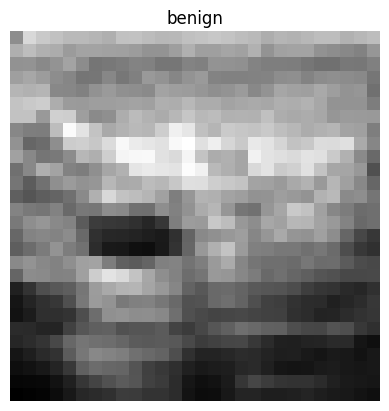

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the first image
img_path = X_train.iloc[0]
img = Image.open(img_path).convert('L')  # Convert to grayscale

# Resize if needed (assuming images are 28x28)
img = img.resize((28, 28))
img = np.array(img)

# Display the image
plt.imshow(img, cmap='gray')
plt.title(Y_train.iloc[0])  # Show the label as title
plt.axis("off")
plt.show()



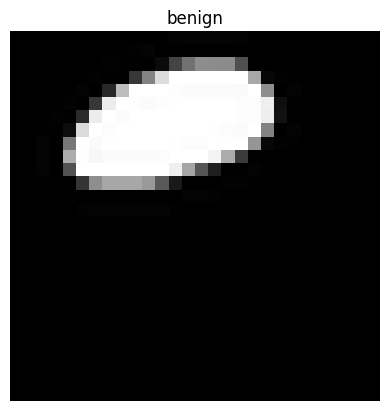

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the image from the path
img_path = X_train.iloc[3]
img = Image.open(img_path).convert('L')  # Convert to grayscale

# Resize or use original dimensions
img = img.resize((28, 28), Image.LANCZOS)  # Optional: resize if needed
img = np.array(img)

# Display the image
plt.imshow(img, cmap='gray')
plt.title(Y_train.iloc[3])  # Use label from Y_train
plt.axis("off")
plt.show()


In [15]:
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your validation data directory
validation_data_dir = '/kaggle/input/breast-ultrasound-images-dataset'  # Change this to your actual validation path

# Function to check if the directory exists
def check_directory_exists(directory):
    if os.path.exists(directory):
        print(f"Directory exists: {directory}")
        return True
    else:
        print(f"Directory does NOT exist: {directory}")
        return False

# Function to list classes and sample images in the validation directory
def list_classes_and_samples(directory):
    if check_directory_exists(directory):
        print("\nListing classes in the validation directory:")
        for class_name in os.listdir(directory):
            class_path = os.path.join(directory, class_name)
            if os.path.isdir(class_path):
                print(f"\nClass: {class_name}")
                image_files = os.listdir(class_path)
                print(f"Sample images in '{class_name}': {image_files[:5]}")  # Show first 5 images

# Function to check if images can be opened
def check_images_validity(directory):
    print("\nChecking image validity...")
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                try:
                    with Image.open(img_path) as img:
                        img.verify()  # Verify image
                    print(f"Valid image: {img_path}")
                except Exception as e:
                    print(f"Invalid image file: {img_path}, Error: {e}")

# Function to load data using ImageDataGenerator
def load_data_with_generator(directory):
    print("\nLoading data using ImageDataGenerator...")
    datagen = ImageDataGenerator(rescale=1.0/255)

    try:
        validation_generator = datagen.flow_from_directory(
            directory,
            target_size=(64, 64),
            batch_size=32,
            class_mode='binary'
        )
        print("Validation generator successfully created.")
    except Exception as e:
        print(f"Error while creating validation generator: {e}")

# Run the checks
if check_directory_exists(validation_data_dir):
    list_classes_and_samples(validation_data_dir)
    check_images_validity(validation_data_dir)
    load_data_with_generator(validation_data_dir)
else:
    print("Please verify your validation dataset path.")


Directory exists: /kaggle/input/breast-ultrasound-images-dataset
Directory exists: /kaggle/input/breast-ultrasound-images-dataset

Listing classes in the validation directory:

Class: Dataset_BUSI_with_GT
Sample images in 'Dataset_BUSI_with_GT': ['benign', 'normal', 'malignant']

Checking image validity...
Invalid image file: /kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign, Error: [Errno 21] Is a directory: '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign'
Invalid image file: /kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/normal, Error: [Errno 21] Is a directory: '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/normal'
Invalid image file: /kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant, Error: [Errno 21] Is a directory: '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant'

Loading data using ImageDataGenerator...
Found 1578 images belon

In [16]:
import os
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define your validation data directory
validation_data_dir = '/kaggle/input/breast-ultrasound-images-dataset'  # Change this to your actual validation path

# Function to check if the directory exists
def check_directory_exists(directory):
    if os.path.exists(directory):
        print(f"Directory exists: {directory}")
        return True
    else:
        print(f"Directory does NOT exist: {directory}")
        return False

# Function to list classes and sample images in the validation directory
def list_classes_and_samples(directory):
    if check_directory_exists(directory):
        print("\nListing classes in the validation directory:")
        for class_name in os.listdir(directory):
            class_path = os.path.join(directory, class_name)
            if os.path.isdir(class_path):
                print(f"\nClass: {class_name}")
                image_files = os.listdir(class_path)
                print(f"Sample images in '{class_name}': {image_files[:5]}")  # Show first 5 images

# Function to check if images can be opened
def check_images_validity(directory):
    print("\nChecking image validity...")
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            for img_file in os.listdir(class_path):
                img_path = os.path.join(class_path, img_file)
                try:
                    with Image.open(img_path) as img:
                        img.verify()  # Verify image
                    print(f"Valid image: {img_path}")
                except Exception as e:
                    print(f"Invalid image file: {img_path}, Error: {e}")

# Function to load data using ImageDataGenerator
def load_data_with_generator(directory):
    print("\nLoading data using ImageDataGenerator...")
    datagen = ImageDataGenerator(rescale=1.0/255)

    try:
        validation_generator = datagen.flow_from_directory(
            directory,
            target_size=(64, 64),
            batch_size=32,
            class_mode='binary'
        )
        print("Validation generator successfully created.")
    except Exception as e:
        print(f"Error while creating validation generator: {e}")

# Run the checks
if check_directory_exists(validation_data_dir):
    list_classes_and_samples(validation_data_dir)
    check_images_validity(validation_data_dir)
    load_data_with_generator(validation_data_dir)
else:
    print("Please verify your validation dataset path.")


Directory exists: /kaggle/input/breast-ultrasound-images-dataset
Directory exists: /kaggle/input/breast-ultrasound-images-dataset

Listing classes in the validation directory:

Class: Dataset_BUSI_with_GT
Sample images in 'Dataset_BUSI_with_GT': ['benign', 'normal', 'malignant']

Checking image validity...
Invalid image file: /kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign, Error: [Errno 21] Is a directory: '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign'
Invalid image file: /kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/normal, Error: [Errno 21] Is a directory: '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/normal'
Invalid image file: /kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant, Error: [Errno 21] Is a directory: '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant'

Loading data using ImageDataGenerator...
Found 1578 images belon

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model


In [18]:
# Setting paths
train_dir = '/kaggle/input/breast-ultrasound-images-dataset'
validation_dir = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT'

# Image data generator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Loading images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Image size
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 1578 images belonging to 1 classes.
Found 1578 images belonging to 3 classes.


In [19]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the input
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,107,265 (19.48 MB)

 Trainable params: 5,107,265 (19.48 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Load a single batch to verify
x_batch, y_batch = next(train_generator)
print("Batch shape:", x_batch.shape)
print("Batch labels shape:", y_batch.shape)


Batch shape: (32, 224, 224, 3)
Batch labels shape: (32,)


In [21]:
import os

print(os.getcwd())  # Check your current working directory
print(os.listdir())  # List all files and folders in the current directory


/kaggle/working
['.virtual_documents']


In [22]:
import os

# Check the dataset folders
print("Input Directory:", os.listdir('../input'))
dataset_folder = os.listdir('../input')[0]
print(f"Dataset Folder Detected: {dataset_folder}")

# Full path check
full_path = os.path.join('../input', dataset_folder)
print("Full Path Contents:", os.listdir(full_path))


Input Directory: ['breast-ultrasound-images-dataset']
Dataset Folder Detected: breast-ultrasound-images-dataset
Full Path Contents: ['Dataset_BUSI_with_GT']


In [ ]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

# Path to your dataset
data_dir = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT'

# ImageDataGenerator for data loading and augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: benign, malignant, normal
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(train_gen, validation_data=val_gen, epochs=20, callbacks=[early_stop])

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_gen)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')

# Predict on validation set and get classification report
val_gen.reset()
preds = model.predict(val_gen)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes

# Classification report
class_labels = list(val_gen.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_labels, output_dict=True)
print(classification_report(y_true, y_pred, target_names=class_labels))

# Plotting Precision, Recall, F1 Score for each class
metrics = ['precision', 'recall', 'f1-score']
fig, ax = plt.subplots(1, len(metrics), figsize=(18, 5))
for i, metric in enumerate(metrics):
    ax[i].bar(class_labels, [report[label][metric] for label in class_labels], color=['blue', 'orange', 'green'])
    ax[i].set_title(metric.capitalize())
    ax[i].set_ylim(0, 1)
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Predict on some sample images from validation set
sample_images, _ = next(val_gen)
predictions = model.predict(sample_images[:5])  # Predict on first 5 images
predicted_classes = np.argmax(predictions, axis=1)

# Display sample images with predictions
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i])
    ax.set_title(f"Predicted: {class_labels[predicted_classes[i]]}")
    ax.axis("off")
plt.show()

Found 1263 images belonging to 3 classes.
Found 315 images belonging to 3 classes.
Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.5081 - loss: 1.1502 - val_accuracy: 0.6032 - val_loss: 0.8266
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.6262 - loss: 0.7776 - val_accuracy: 0.6635 - val_loss: 0.8622
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.7079 - loss: 0.6642 - val_accuracy: 0.6857 - val_loss: 0.7992
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7817 - loss: 0.4995 - val_accuracy: 0.7079 - val_loss: 0.8461
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.8373 - loss: 0.3878 - val_accuracy: 0.7302 - val_loss: 0.9563
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8697 - loss: 0.3412 - val_accuracy: 0.7143 - val_loss: 1.2435
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9049 - loss: 0.2438 - val_accuracy: 0.7270 - val_loss: 1.1607
Epoch 8/20
27/40 ━━━━━━━━━━━━━━━━━

In [ ]:
# Plotting training and validation accuracy and loss
import matplotlib.pyplot as plt

# Training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import os

weights_path = '/kaggle/input/breast-ultrasound-images-dataset'
print("File exists:", os.path.exists(weights_path))


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
import tensorflow as tf

# Load images as a dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT',
    image_size=(224, 224),
    batch_size=32
)


In [ ]:
df.head()


In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed
from keras.layers import LSTM, Bidirectional, Conv1D, concatenate, Permute, Dropout

batch_size = 32
num_classes = 10
epochs = 2

row_hidden = 128
col_hidden = 128

row, col = X_train.shape[1:]

input = Input(shape=(row, col))

def lstm_pipe(in_layer):
    x = Conv1D(row_hidden, kernel_size=3, padding = 'same')(in_layer)
    x = Conv1D(row_hidden, kernel_size=3, padding = 'same')(x)
    encoded_rows = Bidirectional(LSTM(row_hidden, return_sequences = True))(x)
    return LSTM(col_hidden)(encoded_rows)
# read it by rows
first_read = lstm_pipe(input)
# read it by columns
trans_read = lstm_pipe(Permute(dims = (1,2))(input))
encoded_columns = concatenate([first_read, trans_read])
encoded_columns = Dropout(0.2)(encoded_columns)
prediction = Dense(num_classes, activation='softmax')(encoded_columns)
model = Model(input, prediction)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

In [ ]:
print(X_train.shape)


In [ ]:
X_train = np.random.random((1000, 28, 28))  # Example shape (1000 samples, 28 rows, 28 columns)



In [ ]:
if len(X_train.shape) == 3:
    row, col = X_train.shape[1:]
else:
    print("Unexpected shape of X_train:", X_train.shape)


In [ ]:
import cv2
import numpy as np
import os
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define paths
image_dir = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT'

# Initialize lists
X_data = []
y_data = []

# Loop through categories (e.g., benign, malignant, normal)
categories = ['benign', 'malignant', 'normal']
label_map = {'benign': 0, 'malignant': 1, 'normal': 2}

for category in categories:
    category_path = os.path.join(image_dir, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        if img_path.endswith('.png'):  # Check if the file is an image
            # Read image
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (128, 128))  # Resize to a standard size
            X_data.append(img)
            y_data.append(label_map[category])

# Convert to numpy arrays and preprocess
X_data = np.array(X_data).reshape(-1, 128, 128, 1).astype('float32') / 255.0
y_data = np.array(y_data)

# Split data into training and validation sets with a 50% split
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.5, random_state=42)

# Reshape X_train for SMOTE and flatten to 2D
X_train_flattened = X_train.reshape(X_train.shape[0], -1)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_flattened, y_train)

# Reshape back to the original 4D shape
X_train_resampled = X_train_resampled.reshape(-1, 128, 128, 1)

# Convert labels to one-hot encoding
y_train_resampled = to_categorical(y_train_resampled, 3)
y_val = to_categorical(y_val, 3)

print(f"Resampled training data shape: {X_train_resampled.shape}")
print(f"Validation data shape: {X_val.shape}")


In [ ]:
# Define the input layer with the new shape
input = Input(shape=(128, 128, 1))  # Updated shape (128, 128) and single channel (grayscale)


In [ ]:
from keras.layers import Reshape

# Define the input layer with the updated shape
input = Input(shape=(128, 128, 1))  # Shape of (128, 128, 1)

# Reshape the input to a 3D tensor
reshaped_input = Reshape((128, 128))(input)  # Now the shape is (128, 128)

# Permute the dimensions for processing by LSTM
permuted_input = Permute((2, 1))(reshaped_input)  # Shape becomes (128, 128)

# LSTM pipe function
def lstm_pipe(in_layer):
    x = Conv1D(row_hidden, kernel_size=3, padding='same')(in_layer)
    x = Conv1D(row_hidden, kernel_size=3, padding='same')(x)
    encoded_rows = Bidirectional(LSTM(row_hidden, return_sequences=True))(x)
    return LSTM(col_hidden)(encoded_rows)

# Applying LSTM pipeline
first_read = lstm_pipe(permuted_input)
trans_read = lstm_pipe(permuted_input)

# Concatenate the two LSTM outputs
encoded_columns = concatenate([first_read, trans_read])
encoded_columns = Dropout(0.2)(encoded_columns)
prediction = Dense(num_classes, activation='softmax')(encoded_columns)

# Build and compile the model
model = Model(input, prediction)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary
model.summary()


In [ ]:
import os
import numpy as np
import cv2

# Define paths
data_path = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT'
categories = ['benign', 'malignant', 'normal']

# Initialize lists for images and labels
X = []
y = []

# Load images and labels
for category in categories:
    class_label = categories.index(category)  # 0, 1, or 2 for benign, malignant, normal
    folder_path = os.path.join(data_path, category)
    for img_name in os.listdir(folder_path):
        if img_name.endswith('.png'):
            img_path = os.path.join(folder_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Read in grayscale
            img = cv2.resize(img, (128, 128))  # Resize images to a fixed size
            X.append(img)
            y.append(class_label)

# Convert lists to NumPy arrays
X = np.array(X).reshape(-1, 128, 128, 1)  # Reshape to include the channel dimension
y = np.array(y)

# Normalize the images
X = X / 255.0

print("Dataset loaded successfully")
print(f"X shape: {X.shape}, y shape: {y.shape}")


In [ ]:
from keras.utils import to_categorical

num_classes = len(categories)
y = to_categorical(y, num_classes)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")


In [ ]:
from keras.layers import Input, Reshape, SimpleRNN, Bidirectional, Dense, Dropout, Permute, Conv1D, concatenate
from keras.models import Model

# Define the input layer with the updated shape
input = Input(shape=(128, 128, 1))  # Shape of (128, 128, 1)

# Reshape the input to a 3D tensor
reshaped_input = Reshape((128, 128))(input)  # Now the shape is (128, 128)

# Permute the dimensions for processing by RNN (like LSTM)
permuted_input = Permute((2, 1))(reshaped_input)  # Shape becomes (128, 128)

# RNN pipe function
def rnn_pipe(in_layer, row_hidden, col_hidden):
    x = Conv1D(row_hidden, kernel_size=3, padding='same')(in_layer)
    x = Conv1D(row_hidden, kernel_size=3, padding='same')(x)
    encoded_rows = Bidirectional(SimpleRNN(row_hidden, return_sequences=True))(x)  # Using SimpleRNN
    return SimpleRNN(col_hidden)(encoded_rows)  # Final RNN layer for column encoding

# Apply RNN pipeline to the reshaped input
first_read = rnn_pipe(permuted_input, row_hidden=64, col_hidden=32)
trans_read = rnn_pipe(permuted_input, row_hidden=64, col_hidden=32)

# Concatenate the two RNN outputs
encoded_columns = concatenate([first_read, trans_read])
encoded_columns = Dropout(0.2)(encoded_columns)

# Output layer for classification
prediction = Dense(num_classes, activation='softmax')(encoded_columns)

# Build and compile the model
model = Model(inputs=input, outputs=prediction)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model
model.summary()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the validation data generator
val_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Rescale the image pixels to [0, 1]


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to your dataset directories
train_directory = '/path/to/your/train/data'   # Replace with actual path
val_directory = '/path/to/your/val/data'       # Replace with actual path
test_directory = '/path/to/your/test/data'     # Replace with actual path

# Define the image data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.0)  # Rescale for training data
test_datagen = ImageDataGenerator(rescale=1.0/255.0)   # Rescale for test data
val_datagen = ImageDataGenerator(rescale=1.0/255.0)    # Rescale for validation data

# Define your training data generator (train_generator)
train_generator = train_datagen.flow_from_directory(
    train_directory,         # Path to your training data directory
    target_size=(128, 128),  # Resize the images to match the model's input size
    batch_size=32,           # Number of samples per batch
    class_mode='categorical', # For multi-class classification
    shuffle=True             # Shuffle the training data
)

# Define your validation data generator (val_generator)
val_generator = val_datagen.flow_from_directory(
    val_directory,           # Path to your validation data directory
    target_size=(128, 128),  # Resize the images to match input size
    batch_size=32,           # Number of samples per batch
    class_mode='categorical',  # For multi-class classification
    shuffle=False            # Do not shuffle the validation data
)

# Define the test data generator (test_generator)
test_generator = test_datagen.flow_from_directory(
    test_directory,         # Path to the test data directory
    target_size=(128, 128), # Resize the images
    batch_size=32,          # Number of samples per batch
    class_mode='categorical',  # For multi-class classification
    shuffle=False           # Do not shuffle the test data
)

# Train the model
model.fit(train_generator, epochs=10, validation_data=val_generator)

# Evaluate the model on the test set to get accuracy
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy * 100:.2f}%")
